(400, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Age        400 non-null    int64
 1   Salary     400 non-null    int64
 2   Purchased  400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB
None

Accuracy: 0.925

Confusion Matrix:
 [[50  2]
 [ 4 24]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.94        52
           1       0.92      0.86      0.89        28

    accuracy                           0.93        80
   macro avg       0.92      0.91      0.92        80
weighted avg       0.92      0.93      0.92        80



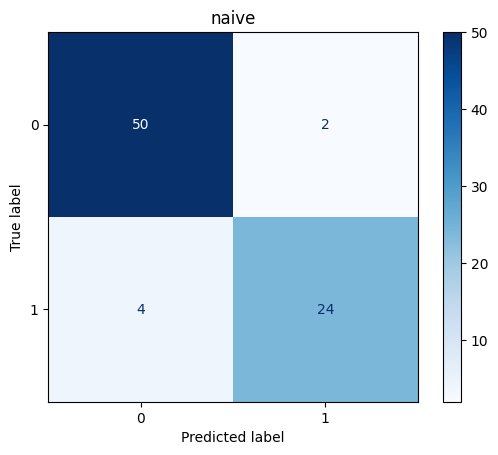

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

df = pd.read_csv("NaiveBayes.csv");
print(df.shape)
print(df.info())
# print(df.head(50))

df.fillna(df.mode().iloc[0], inplace=True)

le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = le.fit_transform(df[col])

x = df.drop("Purchased", axis=1)
y = df["Purchased"]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

model = GaussianNB()
model.fit(x_train, y_train)
y_pred = model.predict(x_test);

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm=confusion_matrix(y_test, y_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("naive")
plt.show();